# Matrix Factorization:

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from scipy.sparse import csc_matrix

In [2]:
!pip install jupyter-resource-usage

In [3]:
print("Matrix...")

Matrix...


In [4]:
# Reading dataset using Pandas

ratings = pd.read_table("./ml-1m/ratings.dat",delimiter="::",names=["userId","movieId","rating","timestamp"], engine='python')

In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
# Removing timestamp attribute

ratings = ratings[['userId', 'movieId', 'rating']]

In [7]:
ratings


,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


---

# Plots

In [8]:
from matplotlib import rcParams

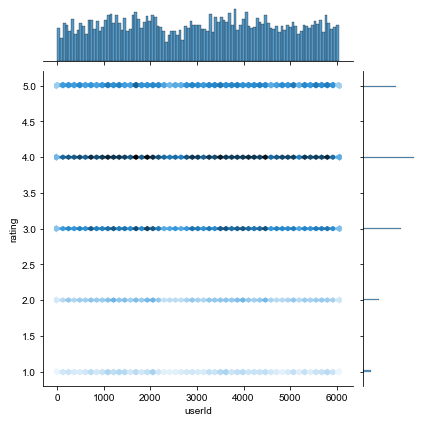

In [9]:
rcParams['figure.figsize'] = 15,8
vis1 = sns.jointplot(data=ratings,x='userId', y='rating', kind='hex')
sns.set_style("white")

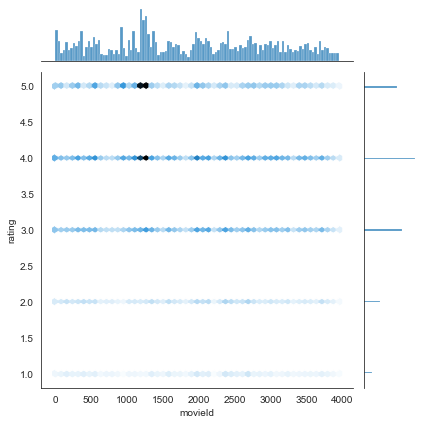

In [10]:
vis1 = sns.jointplot(data=ratings,x='movieId', y='rating', kind='hex')
sns.set_style("white")

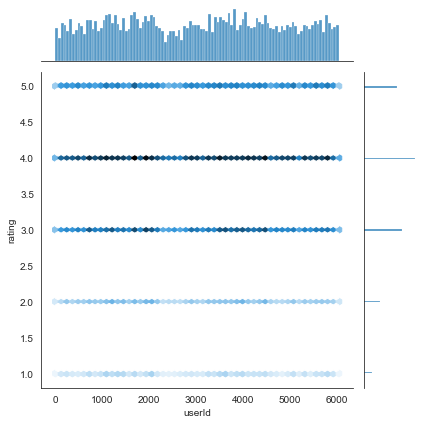

In [11]:
rcParams['figure.figsize'] = 15,10
vis2 = sns.jointplot(data=ratings,x='userId', y='rating', kind='hex')
sns.set_style("white")



-----

<AxesSubplot:xlabel='movieId'>

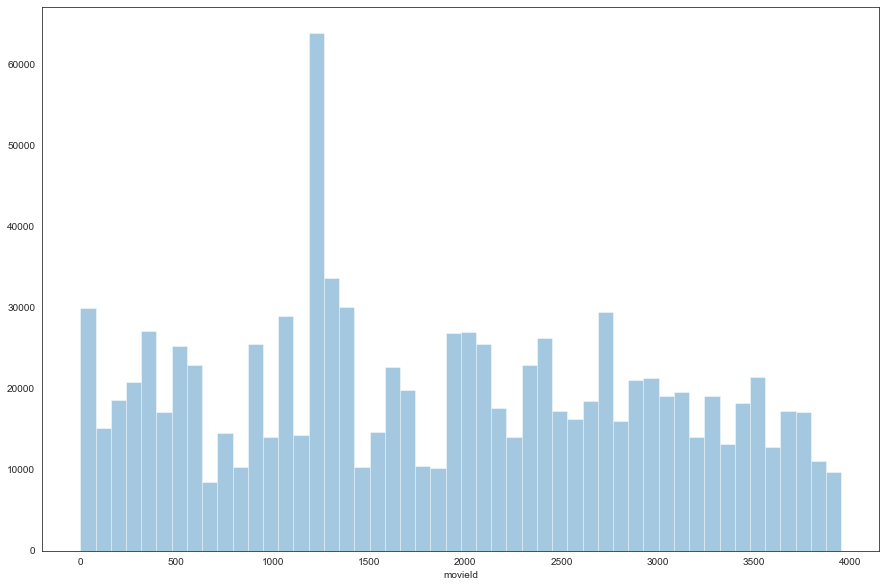

In [14]:
sns.distplot( ratings["movieId"], hist=True, kde=False, rug=False )

<AxesSubplot:>

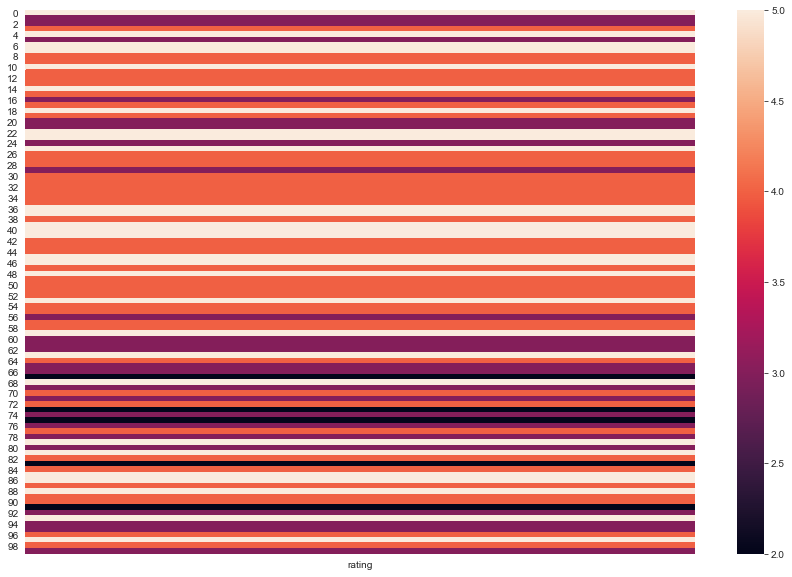

In [15]:
df = ratings[[ 'rating']][:100]

sns.heatmap(df)

In [16]:
# Encoding rows:

def encode_column(column):
    keys = column.unique()
    key_to_index = {key:index for index,key in enumerate(keys)}
    num_keys = len(keys)
    encoded_column  = [key_to_index[i] for i in column]
    return key_to_index,encoded_column,num_keys

In [17]:
encode_column(ratings['userId'])

({1: 0,
  2: 1,
  3: 2,
  4: 3,
  5: 4,
  6: 5,
  7: 6,
  8: 7,
  9: 8,
  10: 9,
  11: 10,
  12: 11,
  13: 12,
  14: 13,
  15: 14,
  16: 15,
  17: 16,
  18: 17,
  19: 18,
  20: 19,
  21: 20,
  22: 21,
  23: 22,
  24: 23,
  25: 24,
  26: 25,
  27: 26,
  28: 27,
  29: 28,
  30: 29,
  31: 30,
  32: 31,
  33: 32,
  34: 33,
  35: 34,
  36: 35,
  37: 36,
  38: 37,
  39: 38,
  40: 39,
  41: 40,
  42: 41,
  43: 42,
  44: 43,
  45: 44,
  46: 45,
  47: 46,
  48: 47,
  49: 48,
  50: 49,
  51: 50,
  52: 51,
  53: 52,
  54: 53,
  55: 54,
  56: 55,
  57: 56,
  58: 57,
  59: 58,
  60: 59,
  61: 60,
  62: 61,
  63: 62,
  64: 63,
  65: 64,
  66: 65,
  67: 66,
  68: 67,
  69: 68,
  70: 69,
  71: 70,
  72: 71,
  73: 72,
  74: 73,
  75: 74,
  76: 75,
  77: 76,
  78: 77,
  79: 78,
  80: 79,
  81: 80,
  82: 81,
  83: 82,
  84: 83,
  85: 84,
  86: 85,
  87: 86,
  88: 87,
  89: 88,
  90: 89,
  91: 90,
  92: 91,
  93: 92,
  94: 93,
  95: 94,
  96: 95,
  97: 96,
  98: 97,
  99: 98,
  100: 99,
  101: 100,
  102:

In [18]:
def encode_df(ratings):
    movie_ids,ratings['movieId'],num_movie = encode_column(ratings['movieId'])
    user_ids,ratings['userId'],num_users = encode_column(ratings['userId'])
    return ratings,num_users,num_movie,user_ids,movie_ids
    

In [19]:
ratings,num_users,num_movie,user_ids,movie_ids = encode_df(ratings)

In [20]:
ratings

,userId,movieId,rating
0,0,0,5
1,0,1,3
2,0,2,3
3,0,3,4
4,0,4,5
...,...,...,...
1000204,6039,772,1
1000205,6039,1106,5
1000206,6039,365,5
1000207,6039,152,4


In [21]:
num_users

6040

In [22]:
num_movie

3706

In [23]:
user_ids

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In [24]:
movie_ids

{1193: 0,
 661: 1,
 914: 2,
 3408: 3,
 2355: 4,
 1197: 5,
 1287: 6,
 2804: 7,
 594: 8,
 919: 9,
 595: 10,
 938: 11,
 2398: 12,
 2918: 13,
 1035: 14,
 2791: 15,
 2687: 16,
 2018: 17,
 3105: 18,
 2797: 19,
 2321: 20,
 720: 21,
 1270: 22,
 527: 23,
 2340: 24,
 48: 25,
 1097: 26,
 1721: 27,
 1545: 28,
 745: 29,
 2294: 30,
 3186: 31,
 1566: 32,
 588: 33,
 1907: 34,
 783: 35,
 1836: 36,
 1022: 37,
 2762: 38,
 150: 39,
 1: 40,
 1961: 41,
 1962: 42,
 2692: 43,
 260: 44,
 1028: 45,
 1029: 46,
 1207: 47,
 2028: 48,
 531: 49,
 3114: 50,
 608: 51,
 1246: 52,
 1357: 53,
 3068: 54,
 1537: 55,
 647: 56,
 2194: 57,
 648: 58,
 2268: 59,
 2628: 60,
 1103: 61,
 2916: 62,
 3468: 63,
 1210: 64,
 1792: 65,
 1687: 66,
 1213: 67,
 3578: 68,
 2881: 69,
 3030: 70,
 1217: 71,
 434: 72,
 2126: 73,
 3107: 74,
 3108: 75,
 3035: 76,
 1253: 77,
 1610: 78,
 292: 79,
 2236: 80,
 3071: 81,
 902: 82,
 368: 83,
 1259: 84,
 3147: 85,
 1544: 86,
 1293: 87,
 1188: 88,
 3255: 89,
 3256: 90,
 3257: 91,
 110: 92,
 2278: 93,
 24

---

Create Embeddings:

In [25]:
def create_embeddings(n,K):
    return 11 * (np.random.random((n,K)))/K

In [26]:
emb_user = create_embeddings(num_users,10)
emb_movie = create_embeddings(num_movie,10)

In [27]:
emb_user

array([[0.30015424, 0.0587968 , 0.51100613, ..., 0.68004654, 0.95227223,
        0.82588103],
       [0.0748669 , 0.55534681, 0.56693496, ..., 0.59106612, 1.04874081,
        0.75811372],
       [0.35106861, 0.11896183, 0.60720184, ..., 0.37374924, 0.35058895,
        0.10307855],
       ...,
       [0.89583442, 0.21652834, 0.47634754, ..., 0.81711194, 0.86460176,
        0.9972737 ],
       [0.54815702, 0.49624511, 0.43817058, ..., 0.8236188 , 0.86539867,
        0.41530146],
       [0.03052088, 0.41467286, 0.1535719 , ..., 0.68461091, 0.10716944,
        0.90876627]])

In [28]:
emb_movie

array([[0.61940293, 0.96851084, 0.38181699, ..., 0.05723199, 0.24026115,
        1.09211429],
       [0.15223224, 0.65410614, 1.07320512, ..., 0.66138202, 0.99466468,
        0.75293301],
       [0.69296   , 0.41059944, 0.3775449 , ..., 0.24246157, 0.16378841,
        0.68110054],
       ...,
       [0.73430606, 0.69465317, 0.14648342, ..., 0.78309105, 0.77571739,
        0.12815542],
       [0.43462317, 0.35082306, 0.07359921, ..., 0.34684202, 0.35250877,
        0.9697762 ],
       [0.77438395, 0.8813282 , 0.78763208, ..., 0.90446868, 0.92537031,
        0.47266617]])

---

In [29]:
# Creating Sparce Matrices:

def create_sparse_matrix(ratings,rows,cols,col_name='rating'):
    return csc_matrix((ratings[col_name].values,(ratings['userId'].values,ratings['movieId'].values)),(rows, cols))

In [30]:
create_sparse_matrix(ratings,num_users,num_movie).todense()

matrix([[5, 3, 3, ..., 0, 0, 0],
        [5, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 3, 4, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0]])

In [31]:
actual = create_sparse_matrix(ratings,num_users,num_movie)

In [32]:
actual

<6040x3706 sparse matrix of type '<class 'numpy.int64'>'
	with 1000209 stored elements in Compressed Sparse Column format>

In [33]:
actual.todense()

matrix([[5, 3, 3, ..., 0, 0, 0],
        [5, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 3, 4, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0]])

In [34]:
# Adding a Prediction column by getting the multiplication and sum of values from the matrices

ratings['prediction'] = np.sum(np.multiply(emb_user[ratings['userId']],emb_movie[ratings['movieId']]),axis=1)

In [35]:
ratings

,userId,movieId,rating,prediction
0,0,0,5,3.075011
1,0,1,3,4.292696
2,0,2,3,2.813533
3,0,3,4,2.779995
4,0,4,5,2.847485
...,...,...,...,...
1000204,6039,772,1,2.519617
1000205,6039,1106,5,3.087108
1000206,6039,365,5,3.022832
1000207,6039,152,4,2.222781


In [36]:
# Converting to Sparse matrix:


predicted = create_sparse_matrix(ratings,num_users,num_movie,'prediction')

In [37]:
predicted

<6040x3706 sparse matrix of type '<class 'numpy.float64'>'
	with 1000209 stored elements in Compressed Sparse Column format>

In [38]:
predicted.todense()

matrix([[3.0750108 , 4.29269567, 2.81353279, ..., 0.        , 0.        ,
         0.        ],
        [2.81244236, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 3.62196084, 2.1185344 , ..., 0.        , 0.        ,
         0.        ],
        [1.78995479, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [39]:
ratings.shape

(1000209, 4)

In [40]:
ratings.shape[0]

1000209

In [41]:
#Cost function or Mean Squared Function

cost = np.sum((actual-predicted).power(2))/ratings.shape[0] 
cost

2.3009133962682813

----

#Learning

In [42]:
lmbda = 0.0002
learning_rate=0.001

In [43]:
delta =(actual-predicted)
grad_user = (-2/ratings.shape[0])*(delta*emb_movie) + 2*lmbda*emb_user
grad_movie = (-2/ratings.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_movie

In [44]:
def predict(df,emb_user,emb_movie):
    df['prediction'] = np.sum(np.multiply(emb_user[df['userId']],emb_movie[df['movieId']]),axis=1)
    return df

In [45]:
def calculateCost(df,emb_user,emb_movie):
    actual =create_sparse_matrix(df,emb_user.shape[0],emb_movie.shape[0])
    predicted = create_sparse_matrix(predict(df,emb_user,emb_movie),num_users,num_movie,'prediction')
    return np.sum((actual-predicted).power(2))/df.shape[0]

In [46]:
def gradient(df,emb_user,emb_movie):
    actual =create_sparse_matrix(df,emb_user.shape[0],emb_movie.shape[0])
    predicted = create_sparse_matrix(predict(df,emb_user,emb_movie),num_users,num_movie,'prediction')
    delta = actual - predicted
    grad_user = (-2/ratings.shape[0])*(delta*emb_movie) + 2*lmbda*emb_user
    grad_movie = (-2/ratings.shape[0])*(delta.T*emb_user) + 2*lmbda*emb_movie
    return grad_user, grad_movie

In [47]:
#Training Function:

def training(df,emb_user,emb_movie,iteration=1000,learning_rate=0.001):
    beta =0.9
    
    grad_user, grad_movie = gradient(df, emb_user, emb_movie)
    v_user = grad_user
    v_movie = grad_movie
    for i in range(iteration):
        grad_user, grad_movie = gradient(df, emb_user, emb_movie)
        v_user = beta*v_user + (1-beta)*grad_user
        v_movie = beta*v_movie + (1-beta)*grad_movie
        emb_user = emb_user - learning_rate*v_user
        emb_movie = emb_movie - learning_rate*v_movie
        
        if((i+1)%50==0):
            cost = calculateCost(df,emb_user,emb_movie)
            print("\ncost in {}th iteration:".format(i+1),cost)
            
        
    return emb_user,emb_movie

In [48]:
emb_user, emb_movie = training(ratings, emb_user, emb_movie, iteration=1000,learning_rate = 0.01)


cost in 50th iteration: 2.295239742324406

cost in 100th iteration: 2.289612092872912

cost in 150th iteration: 2.2840307585885564

cost in 200th iteration: 2.2784951972180294

cost in 250th iteration: 2.2730048701884273

cost in 300th iteration: 2.2675592468862162

cost in 350th iteration: 2.262157804543869

cost in 400th iteration: 2.2568000281063947

cost in 450th iteration: 2.2514854101002575

cost in 500th iteration: 2.246213450504755

cost in 550th iteration: 2.240983656625801

cost in 600th iteration: 2.235795542972064

cost in 650th iteration: 2.230648631133419

cost in 700th iteration: 2.225542449661658

cost in 750th iteration: 2.2204765339534256

cost in 800th iteration: 2.215450426135318

cost in 850th iteration: 2.2104636749511215

cost in 900th iteration: 2.2055158356511306

cost in 950th iteration: 2.2006064698835175

cost in 1000th iteration: 2.195735145587697


In [49]:
emb_user, emb_movie = training(ratings, emb_user, emb_movie, iteration=1000,learning_rate = 0.1)


cost in 50th iteration: 2.1487839854113187

cost in 100th iteration: 2.10519456762133

cost in 150th iteration: 2.064684052964719

cost in 200th iteration: 2.0269444216314936

cost in 250th iteration: 1.9917065947093018

cost in 300th iteration: 1.9587349927496447

cost in 350th iteration: 1.9278226742227047

cost in 400th iteration: 1.8987872530910754

cost in 450th iteration: 1.8714674624530678

cost in 500th iteration: 1.8457202540421105

cost in 550th iteration: 1.8214183433131563

cost in 600th iteration: 1.7984481259995277

cost in 650th iteration: 1.7767079051339587

cost in 700th iteration: 1.7561063781961277

cost in 750th iteration: 1.7365613427521192

cost in 800th iteration: 1.7179985860682039

cost in 850th iteration: 1.7003509300148667

cost in 900th iteration: 1.6835574073695865

cost in 950th iteration: 1.6675625495730895

cost in 1000th iteration: 1.65231576925036


In [50]:
emb_user, emb_movie = training(ratings, emb_user, emb_movie, iteration=1000,learning_rate = 1)


cost in 50th iteration: 1.529438152542708

cost in 100th iteration: 1.4496568984476115

cost in 150th iteration: 1.3965967082157325

cost in 200th iteration: 1.360882915981862

cost in 250th iteration: 1.3370725779655812

cost in 300th iteration: 1.3217579906464447

cost in 350th iteration: 1.312686011403971

cost in 400th iteration: 1.3083030833946048

cost in 450th iteration: 1.3075012313072163

cost in 500th iteration: 1.3094678716770158

cost in 550th iteration: 1.3135929088438176

cost in 600th iteration: 1.3194090924037003

cost in 650th iteration: 1.3265524970357585

cost in 700th iteration: 1.3347356019304681

cost in 750th iteration: 1.3437284969790615

cost in 800th iteration: 1.3533454697064653

cost in 850th iteration: 1.3634352394282512

cost in 900th iteration: 1.373873716867883

cost in 950th iteration: 1.3845585469499841

cost in 1000th iteration: 1.3954049334713652


In [51]:
emb_user, emb_movie = training(ratings, emb_user, emb_movie, iteration=1000,learning_rate = 0.5)


cost in 50th iteration: 1.4008382434894429

cost in 100th iteration: 1.4062906322300797

cost in 150th iteration: 1.411750934043802

cost in 200th iteration: 1.4172128706601883

cost in 250th iteration: 1.4226707205273368

cost in 300th iteration: 1.4281192510931031

cost in 350th iteration: 1.4335536783775957

cost in 400th iteration: 1.4389696304645028

cost in 450th iteration: 1.4443631143714672

cost in 500th iteration: 1.4497304859352704

cost in 550th iteration: 1.4550684223932575

cost in 600th iteration: 1.4603738973810336

cost in 650th iteration: 1.4656441580997575

cost in 700th iteration: 1.4708767044351367

cost in 750th iteration: 1.476069269835236

cost in 800th iteration: 1.481219803775974

cost in 850th iteration: 1.486326455662197

cost in 900th iteration: 1.4913875600288475

cost in 950th iteration: 1.496401622921359

cost in 1000th iteration: 1.5013673093472253


In [52]:
emb_user, emb_movie = training(ratings, emb_user, emb_movie, iteration=1000,learning_rate = 2)


cost in 50th iteration: 1.5209062605905874

cost in 100th iteration: 1.5396360564267537

cost in 150th iteration: 1.5574610546889573

cost in 200th iteration: 1.5743718722286402

cost in 250th iteration: 1.5903743409492332

cost in 300th iteration: 1.6054850950894333

cost in 350th iteration: 1.61972851309278

cost in 400th iteration: 1.6331343906905003

cost in 450th iteration: 1.6457361645357271

cost in 500th iteration: 1.657569554003447

cost in 550th iteration: 1.6686715232342857

cost in 600th iteration: 1.6790794903815836

cost in 650th iteration: 1.6888307289575188

cost in 700th iteration: 1.697961919228197

cost in 750th iteration: 1.7065088172309995

cost in 800th iteration: 1.7145060161765742

cost in 850th iteration: 1.7219867804376332

cost in 900th iteration: 1.7289829364922307

cost in 950th iteration: 1.735524808413734

cost in 1000th iteration: 1.7416411880203004
